In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline


#### Чтение данных из файла

In [3]:
df= pd.read_csv('Test.csv') # Можно изменить файл

#### Статическая информация по используемым данным

In [10]:
df.describe()

,Unnamed: 0,X,y,y_pred
count,11.000000,11.000000,11.000000,11.000000
mean,5.000000,3.181818,15.818182,15.818182
std,3.316625,1.662419,2.993933,2.865485
min,0.000000,1.000000,11.000000,10.960526
25%,2.500000,2.000000,13.500000,13.546053
50%,5.000000,3.000000,17.000000,16.131579
75%,7.500000,4.500000,18.000000,17.855263
max,10.000000,6.000000,20.000000,19.578947


#### Изображение исходных точек

<Axes: xlabel='X', ylabel='y'>

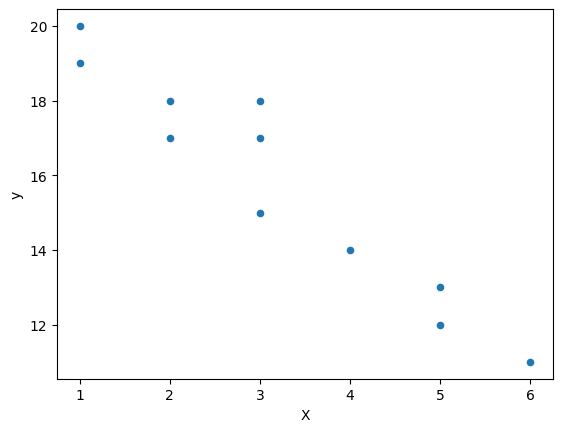

In [4]:
df.plot(x='X',y='y',kind='scatter')

#### Нахождение параметров регрессионной прямой y=ax+b методом наименьших квадратов

In [5]:
X = np.array([np.ones(len(df)),df.X]).T
y = np.array(df.y).T
X_T_X_inv = np.linalg.inv(X.T.dot(X))
B = X_T_X_inv.dot(X.T.dot(y))
print(f'a = {B[1]}, b = {B[0]}') 

a = -1.7236842105263173, b = 21.302631578947377


In [8]:
df['y_pred']=df.X*B[1]+B[0]
df

,Unnamed: 0,X,y,y_pred
0,0,1,20,19.578947
1,1,2,17,17.855263
2,2,3,17,16.131579
3,3,4,14,14.407895
4,4,5,12,12.684211
5,5,6,11,10.960526
6,6,5,13,12.684211
7,7,3,15,16.131579
8,8,2,18,17.855263
9,9,3,18,16.131579


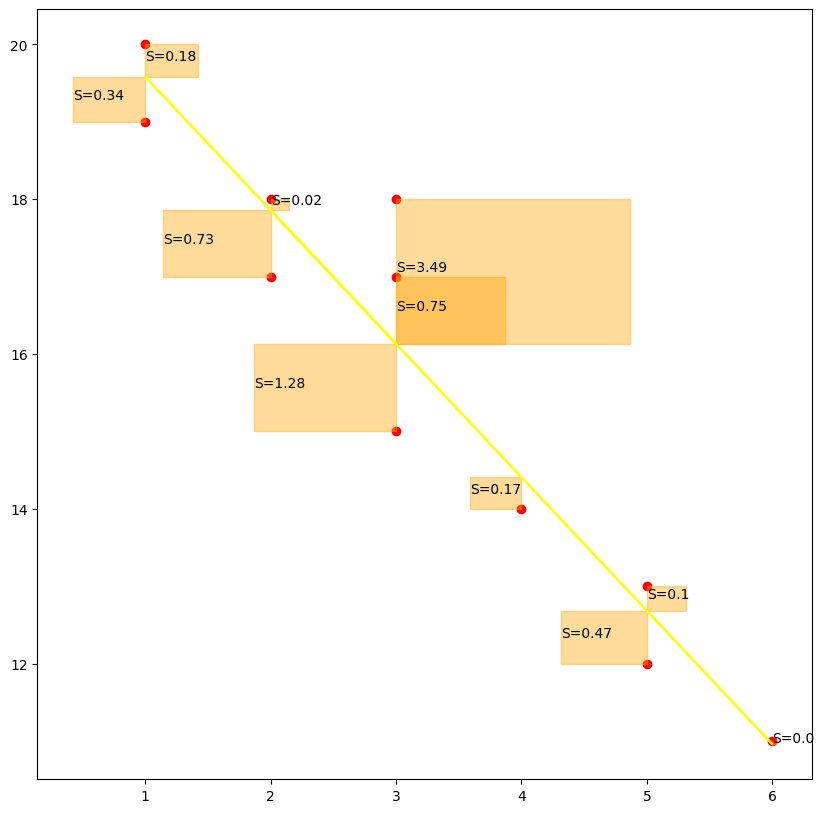

In [9]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(df.X ,df.y,color='red')
ax.plot(df.X,df.y_pred,'yellow')
if B[1]>=0:
    for res in df.index:
        start = (df.loc[res].X,df.loc[res].y)
        side_length=df.loc[res].y-df.loc[res].y_pred
        ax.add_patch(Rectangle(start, -side_length, -side_length,fill=True,alpha=0.4,color='orange'))
        if side_length>0:
            ax.text(start[0]-side_length,start[1]-side_length/2,f"S={round(side_length*side_length,2)}")
        else:
            ax.text(start[0],start[1]-side_length/2,f"S={round(side_length*side_length,2)}")
else:
    for res in df.index:
        start = (df.loc[res].X,df.loc[res].y)
        side_length=df.loc[res].y-df.loc[res].y_pred
        ax.add_patch(Rectangle(start, side_length, -side_length,fill=True,alpha=0.4,color='orange'))
        if side_length>0:
            ax.text(start[0],start[1]-side_length/2,f"S={round(side_length*side_length,2)}")
        else:
            ax.text(start[0]+side_length,start[1]-side_length/2,f"S={round(side_length*side_length,2)}")
plt.show()